In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,  font_manager
import matplotlib
fontname = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=fontname).get_name()
rc('font', family=font_name)

In [14]:
kini_data = pd.read_csv('data/TEMP/경락가격/애호박/애호박 월별 총거래물량(정제).csv', index_col=None)

In [16]:
kini_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   regDate     44 non-null     object 
 1   서울 총거래물량    44 non-null     int64  
 2   서울 총거래금액    44 non-null     int64  
 3   서울kg당 평균가격  44 non-null     float64
 4   부산 총거래물량    44 non-null     float64
 5   부산 총거래금액    44 non-null     int64  
 6   부산kg당 평균가격  44 non-null     float64
 7   대구 총거래물량    44 non-null     float64
 8   대구 총거래금액    44 non-null     int64  
 9   대구kg당 평균가격  44 non-null     float64
 10  대전 총거래물량    44 non-null     float64
 11  대전 총거래금액    44 non-null     int64  
 12  대전kg당 평균가격  44 non-null     float64
 13  광주 총거래물량    44 non-null     int64  
 14  광주 총거래금액    44 non-null     int64  
 15  광주kg당 평균가격  44 non-null     float64
dtypes: float64(8), int64(7), object(1)
memory usage: 5.6+ KB


In [19]:
print(kini_data['regDate'][1],kini_data['서울 총거래물량'][1])
print(kini_data['regDate'][2],kini_data['서울 총거래물량'][2])

2023-07 130450
2023-06 96620


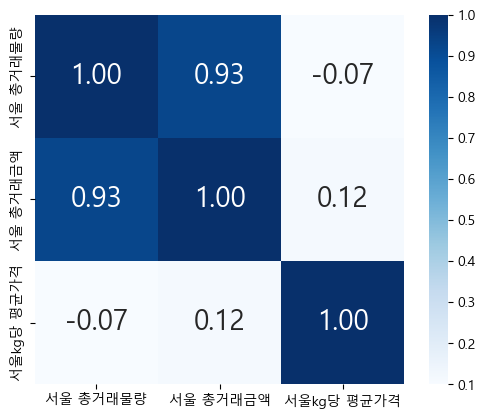

In [97]:
list = [kini_data['서울 총거래물량'], kini_data['서울 총거래금액'], kini_data['서울kg당 평균가격']]
column_names = ['서울 총거래물량', '서울 총거래금액', '서울kg당 평균가격']
df1 = pd.DataFrame(list).T
df1.columns = column_names
corr=df1.corr()

corr_heatmap = sns.heatmap( corr, 
                           cbar=True, 
                           annot=True, 
                           annot_kws={'size': 20}, 
                           fmt='.2f', 
                           square=True, 
                           cmap='Blues',
                           vmin=0.1,
                           vmax=1
                           )

In [58]:
kini_data['regDate'] = pd.to_datetime(kini_data['regDate'])
kini_year = kini_data['regDate'].dt.year
kini_amount_grade = []
for i in range(len(kini_data)):
    if i != len(kini_data)-1:
        A = str(kini_data['regDate'][i]) + "-" + str(kini_data['regDate'][i+1])
        kini_amount_grade.append([ A ,kini_data['서울 총거래물량'][i]- kini_data['서울 총거래물량'][i+1], kini_data['서울 총거래금액'][i]- kini_data['서울 총거래금액'][i+1], kini_data['서울kg당 평균가격'][i]- kini_data['서울kg당 평균가격'][i+1], kini_year[i]])
        

kini_amount_grade

[['2023-08-01 00:00:00-2023-07-01 00:00:00',
  -86377,
  -175573000,
  -381.41614538136446,
  2023],
 ['2023-07-01 00:00:00-2023-06-01 00:00:00',
  33830,
  135960000,
  763.6069957987411,
  2023],
 ['2023-06-01 00:00:00-2023-05-01 00:00:00',
  72960,
  71759000,
  -280.2339620158832,
  2023],
 ['2023-05-01 00:00:00-2023-04-01 00:00:00',
  23590,
  31925000,
  -445.3508030431108,
  2023],
 ['2023-04-01 00:00:00-2023-03-01 00:00:00',
  -787,
  -2260000,
  -984.1306884480746,
  2023],
 ['2023-03-01 00:00:00-2023-02-01 00:00:00',
  -303,
  -932000,
  -76.2141391381324,
  2023],
 ['2023-02-01 00:00:00-2023-01-01 00:00:00',
  -2270,
  -6589000,
  -27.993364833618216,
  2023],
 ['2023-01-01 00:00:00-2022-12-01 00:00:00',
  3430,
  9907000,
  2888.338192419825,
  2023],
 ['2022-12-01 00:00:00-2022-11-01 00:00:00',
  -21050,
  -21267000,
  -1010.3087885985748,
  2022],
 ['2022-11-01 00:00:00-2022-10-01 00:00:00',
  -110390,
  -151798500,
  -306.37943416466317,
  2022],
 ['2022-10-01 00:00:00-2

In [59]:
df = pd.DataFrame(kini_amount_grade, columns=['regDate', 'amount_grade', 'allpay_grade', 'pay_grade', 'year'])
df.to_csv('data/MART/경락가격/애호박 서울 변화량(add year).csv', index=False, encoding='UTF-8')

                                   regDate  amount_grade  allpay_grade  \
0  2023-08-01 00:00:00-2023-07-01 00:00:00        -86377    -175573000   
1  2023-07-01 00:00:00-2023-06-01 00:00:00         33830     135960000   
2  2023-06-01 00:00:00-2023-05-01 00:00:00         72960      71759000   
3  2023-05-01 00:00:00-2023-04-01 00:00:00         23590      31925000   
4  2023-04-01 00:00:00-2023-03-01 00:00:00          -787      -2260000   
5  2023-03-01 00:00:00-2023-02-01 00:00:00          -303       -932000   
6  2023-02-01 00:00:00-2023-01-01 00:00:00         -2270      -6589000   
7  2023-01-01 00:00:00-2022-12-01 00:00:00          3430       9907000   

     pay_grade  year  
0  -381.416145  2023  
1   763.606996  2023  
2  -280.233962  2023  
3  -445.350803  2023  
4  -984.130688  2023  
5   -76.214139  2023  
6   -27.993365  2023  
7  2888.338192  2023  
                                    regDate  amount_grade  allpay_grade  \
8   2022-12-01 00:00:00-2022-11-01 00:00:00        

C:\Users\admin\AppData\Local\Temp\ipykernel_10244\2847677816.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('data/월별[년도] 거래물량.png')
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


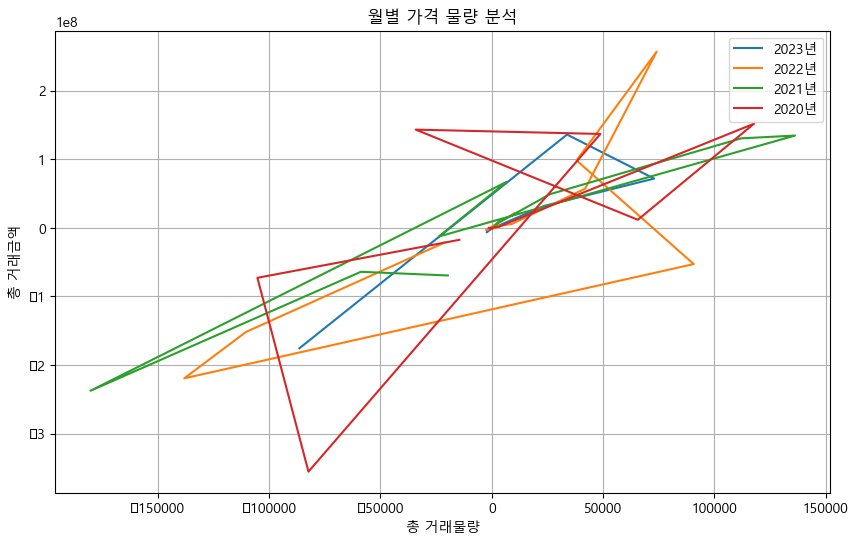

In [70]:
years = df['year'].unique()

plt.figure(figsize=(10, 6))
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['amount_grade'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['amount_grade'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['amount_grade'], label=f'{year}년')
plt.xlabel('총 거래물량')
plt.ylabel('총 거래금액')
plt.title('월별 가격 물량 분석')
plt.legend()
plt.grid(True)
plt.savefig('data/월별[년도] 거래물량.png')
plt.show()



C:\Users\admin\AppData\Local\Temp\ipykernel_10244\808371037.py:3: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('data/평균 거래금액과 총 거래물량 산점도 그래프.png')


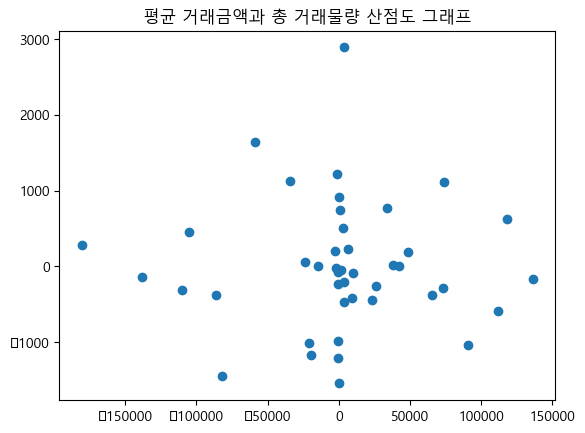

In [83]:
plt.title('평균 거래금액과 총 거래물량 산점도 그래프')
plt.scatter(df['amount_grade'], df['pay_grade'])
plt.savefig('data/평균 거래금액과 총 거래물량 산점도 그래프.png')

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


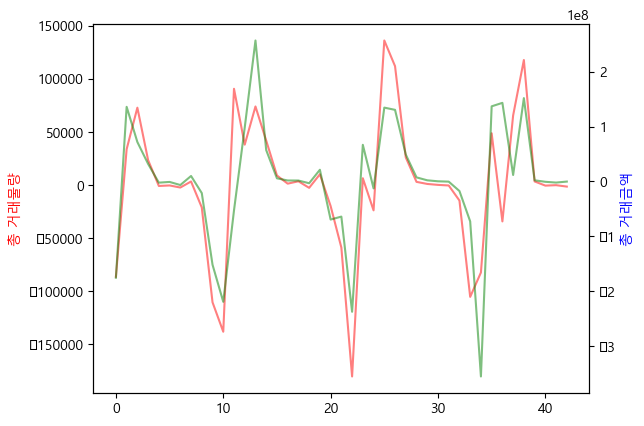

<Figure size 1280x768 with 0 Axes>

In [107]:
fig, ax1 = plt.subplots()
plt.figure(dpi=128,  figsize=(10,6))
ax1.plot(range(0, len(df)), df['amount_grade'], c= 'red', alpha=0.5, label='총 거래물량')
ax1.set_ylabel('총 거래물량', color = 'red', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(range(0, len(df)), df['allpay_grade'], c= 'green', alpha=0.5, label='총 거래금액')
ax2.set_ylabel('총 거래금액', color = 'blue', rotation = 90)

plt.savefig("data/총 거래물량 + 총 거래금액.png")
plt.show()


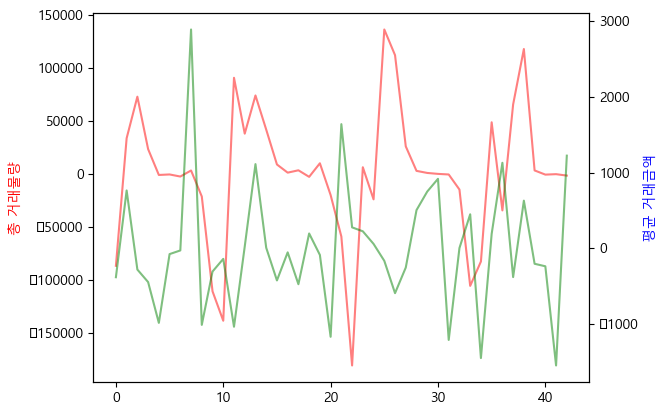

<Figure size 1280x768 with 0 Axes>

In [108]:
fig, ax1 = plt.subplots()
plt.figure(dpi=128,  figsize=(10,6))
ax1.plot(range(0, len(df)), df['amount_grade'], c= 'red', alpha=0.5, label='총 거래물량')
ax1.set_ylabel('총 거래물량', color = 'red', rotation = 90)
ax2 = ax1.twinx()
ax2.plot(range(0, len(df)), df['pay_grade'], c= 'green', alpha=0.5, label='평균 거래금액')
ax2.set_ylabel('평균 거래금액', color = 'blue', rotation = 90)

plt.savefig("data/총 거래물량 + 평균 거래금액.png")
plt.show()


     regDate  서울 총거래물량   서울 총거래금액   서울kg당 평균가격   부산 총거래물량    부산 총거래금액  \
0 2023-08-01     44073   64197000  1456.606085   433281.4   633087000   
1 2023-07-01    130450  239770000  1838.022231  1318353.1  2037195700   
2 2023-06-01     96620  103810000  1074.415235  1396719.7  1781727600   
3 2023-05-01     23660   32051000  1354.649197  1431614.4  1966951200   
4 2023-04-01        70     126000  1800.000000  1090540.1  2174104900   
5 2023-03-01       857    2386000  2784.130688   777951.0  2297217200   
6 2023-02-01      1160    3318000  2860.344828   384482.3  1713466250   
7 2023-01-01      3430    9907000  2888.338192   392630.9  1670488600   

    부산kg당 평균가격   대구 총거래물량    대구 총거래금액   대구kg당 평균가격  대전 총거래물량  대전 총거래금액  \
0  1461.145113   644000.0  1106833300  1718.685248   14340.0  19106600   
1  1545.258019  1989268.0  3405507100  1711.939819   47352.5  71571105   
2  1275.651514  2656008.0  3233615300  1217.471973   38660.0  37119073   
3  1373.939240  2287530.0  3083761400  1348.07

KeyError: 'amount_grade'

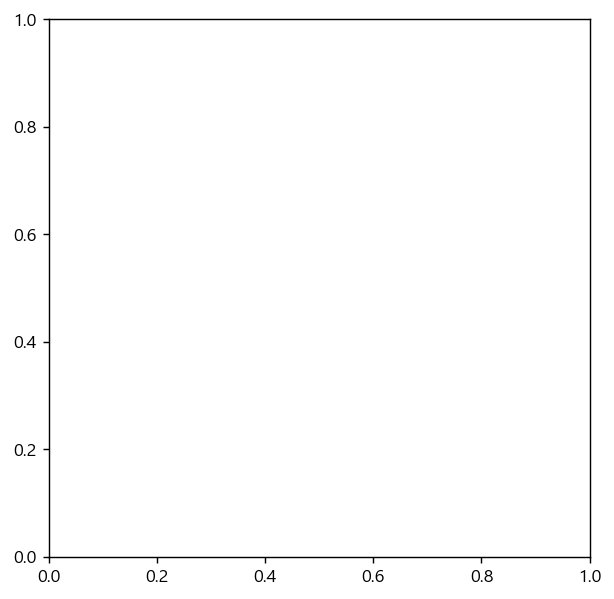

In [117]:
years = kini_data['regDate'].dt.year.unique()
fig = plt.figure(dpi=128,  figsize=(12,12))


plt.subplot(2, 2, 1)
for year in years:
    year_data = kini_data[kini_data['regDate'].dt.year == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['서울 총거래물량'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['서울 총거래물량'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['서울 총거래물량'], label=f'{year}년')
plt.title("총 거래물량 변화율")
plt.xlabel("월")
plt.xticks(range(1, 13), [f'{i}월' for i in range(1, 13)])
plt.ylabel("총 거래물량 변화율")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['서울 총거래금액'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['서울 총거래금액'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['서울 총거래금액'], label=f'{year}년')
plt.title("총 거래금액 변화율")
plt.xlabel("월")
plt.xticks(range(1, 13), [f'{i}월' for i in range(1, 13)])
plt.ylabel("총 거래금액 변화율")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['서울kg당 평균가격'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['서울kg당 평균가격'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['서울kg당 평균가격'], label=f'{year}년')
plt.title("평균 거래금액 변화율")
plt.xlabel("월")
plt.xticks(range(1, 13), [f'{i}월' for i in range(1, 13)])
plt.ylabel("평균 거래금액 변화율")
plt.legend()
plt.grid(True)
plt.savefig("data/거래물량, 거래금액 그래프.png")
plt.show()


                                   regDate  amount_grade  allpay_grade  \
0  2023-08-01 00:00:00-2023-07-01 00:00:00        -86377    -175573000   
1  2023-07-01 00:00:00-2023-06-01 00:00:00         33830     135960000   
2  2023-06-01 00:00:00-2023-05-01 00:00:00         72960      71759000   
3  2023-05-01 00:00:00-2023-04-01 00:00:00         23590      31925000   
4  2023-04-01 00:00:00-2023-03-01 00:00:00          -787      -2260000   
5  2023-03-01 00:00:00-2023-02-01 00:00:00          -303       -932000   
6  2023-02-01 00:00:00-2023-01-01 00:00:00         -2270      -6589000   
7  2023-01-01 00:00:00-2022-12-01 00:00:00          3430       9907000   

     pay_grade  year  
0  -381.416145  2023  
1   763.606996  2023  
2  -280.233962  2023  
3  -445.350803  2023  
4  -984.130688  2023  
5   -76.214139  2023  
6   -27.993365  2023  
7  2888.338192  2023  
                                    regDate  amount_grade  allpay_grade  \
8   2022-12-01 00:00:00-2022-11-01 00:00:00        

C:\Users\admin\AppData\Local\Temp\ipykernel_10244\1487338121.py:52: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig("data/각각의 그래프.png")
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


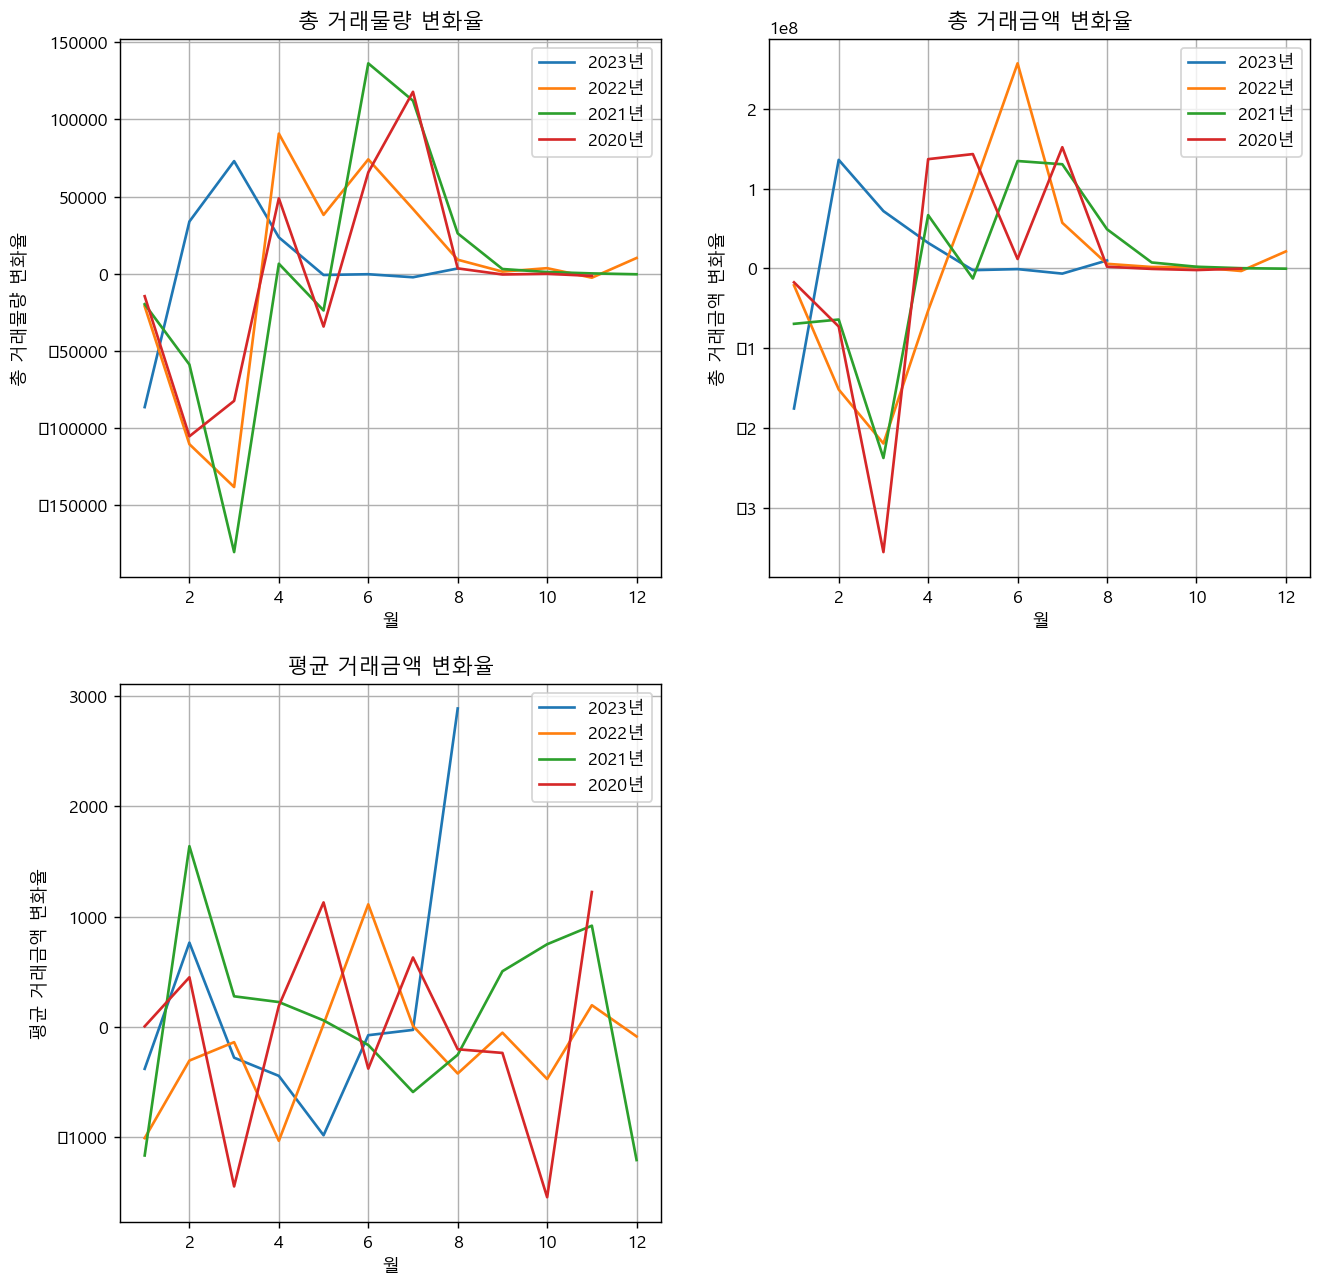

In [116]:
years = df['year'].unique()
fig = plt.figure(dpi=128,  figsize=(12,12))


plt.subplot(2, 2, 1)
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['amount_grade'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['amount_grade'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['amount_grade'], label=f'{year}년')
plt.title("총 거래물량 변화율")
plt.xlabel("월")
plt.ylabel("총 거래물량 변화율")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['allpay_grade'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['allpay_grade'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['allpay_grade'], label=f'{year}년')
plt.title("총 거래금액 변화율")
plt.xlabel("월")
plt.ylabel("총 거래금액 변화율")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['pay_grade'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['pay_grade'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['pay_grade'], label=f'{year}년')
plt.title("평균 거래금액 변화율")
plt.xlabel("월")
plt.ylabel("평균 거래금액 변화율")
plt.legend()
plt.grid(True)
plt.savefig("data/거래물량, 거래금액 그래프 변화율.png")
plt.show()


In [ ]:
years = df['year'].unique()

plt.figure(figsize=(10, 6))
for year in years:
    year_data = df[df['year'] == year]
    print(year_data)
    if (year == 2023):
        plt.plot(range(1, 9), year_data['amount_grade'], label=f'{year}년')
    elif (year == 2020):
        plt.plot(range(1, 12), year_data['amount_grade'], label=f'{year}년')
    else:
        plt.plot(range(1, 13), year_data['amount_grade'], label=f'{year}년')
plt.xlabel('총 거래물량')
plt.ylabel('총 거래금액')
plt.title('월별 가격 물량 분석')
plt.legend()
plt.grid(True)
plt.savefig('data/월별[년도] 거래물량.png')
plt.show()



In [40]:
df['abs_amount_grade'] = abs(df['amount_grade'])
df['abs_allpay_grade'] = abs(df['allpay_grade'])
df['abs_pay_grade'] = abs(df['pay_grade'])

In [41]:
df

,regDate,amount_grade,allpay_grade,pay_grade,abs_amount_grade,abs_allpay_grade,abs_pay_grade
0,2023-08-2023-07,-86377,-175573000,-381.416145,86377,175573000,381.416145
1,2023-07-2023-06,33830,135960000,763.606996,33830,135960000,763.606996
2,2023-06-2023-05,72960,71759000,-280.233962,72960,71759000,280.233962
3,2023-05-2023-04,23590,31925000,-445.350803,23590,31925000,445.350803
4,2023-04-2023-03,-787,-2260000,-984.130688,787,2260000,984.130688
5,2023-03-2023-02,-303,-932000,-76.214139,303,932000,76.214139
6,2023-02-2023-01,-2270,-6589000,-27.993365,2270,6589000,27.993365
7,2023-01-2022-12,3430,9907000,2888.338192,3430,9907000,2888.338192
8,2022-12-2022-11,-21050,-21267000,-1010.308789,21050,21267000,1010.308789
9,2022-11-2022-10,-110390,-151798500,-306.379434,110390,151798500,306.379434


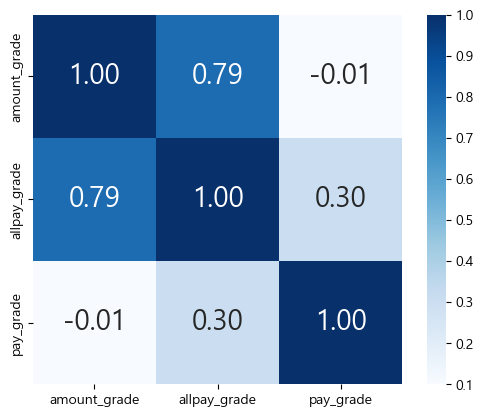

In [44]:
list = [ df['amount_grade'], df['allpay_grade'], df['pay_grade']]
column_names = ['amount_grade', 'allpay_grade', 'pay_grade']
df1 = pd.DataFrame(list).T
df1.columns = column_names
corr=df1.corr()

corr_heatmap = sns.heatmap( corr, 
                           cbar=True, 
                           annot=True, 
                           annot_kws={'size': 20}, 
                           fmt='.2f', 
                           square=True, 
                           cmap='Blues',
                           vmin=0.1,
                           vmax=1
                           )

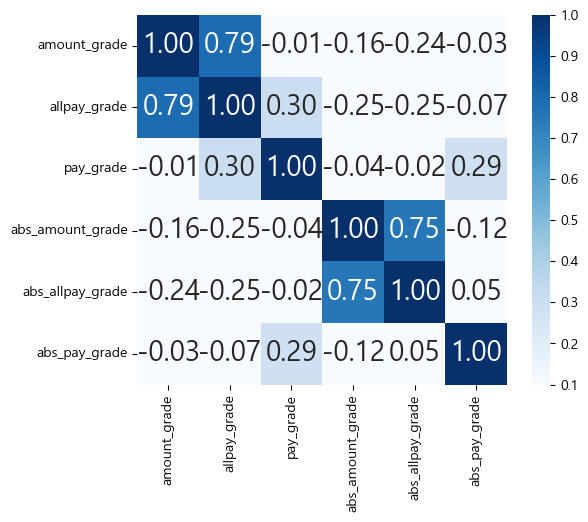

In [43]:
list = [ df['amount_grade'], df['allpay_grade'], df['pay_grade'], df['abs_amount_grade'], df['abs_allpay_grade'], df['abs_pay_grade']]
column_names = ['amount_grade', 'allpay_grade', 'pay_grade', 'abs_amount_grade', 'abs_allpay_grade', 'abs_pay_grade']
df1 = pd.DataFrame(list).T
df1.columns = column_names
corr=df1.corr()

corr_heatmap = sns.heatmap( corr, 
                           cbar=True, 
                           annot=True, 
                           annot_kws={'size': 20}, 
                           fmt='.2f', 
                           square=True, 
                           cmap='Blues',
                           vmin=0.1,
                           vmax=1
                           )

In [32]:
df['amount_grade'].corr(df['allpay_grade'])

0.7909677503961743